# **Computer Vision in HealthCare Application Lab-1**

# **Topic: Noise and Denoising**

## Name: Sagnik Chatterjee

## Reg.No: 19BAI1153

### Dataset used: Skin Cancer HAM10000



##**LAB1: Question** 
1. Using OpenCV import a colour image and convert the same to its grey scale equivalent.

2. Understand the impact of different types on noise in images (Gaussian, Salt & Pepper, Poisson, Spectacle) by introducing different types of noise to images. Identify different filters (Gaussian, Median, Mean and Weiner) that might suppress the different types of noise in images. Through experimentation, determine, which filter is best suited for suppressing each type of noise present in an image.

## **Libraries**


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.filters import median
from skimage import io,color, img_as_float, img_as_int
from scipy.signal.signaltools import wiener
from skimage.util import random_noise

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

**First we read Image and convert it to grayscale**

**Then we add various noises to the image**

**Finally we denoise the images with various filters**

Image taken from skin cancer HAM10000 dataset


Shape of the image:  (450, 600, 3)
Original Image: 



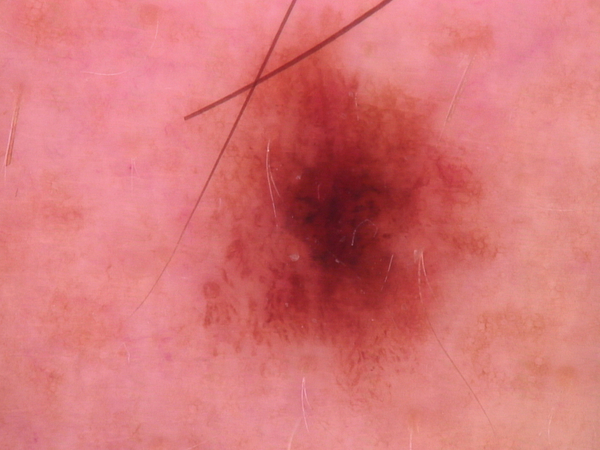

In [10]:
img = cv2.imread('/content/ISIC_0024306.jpg')
print("Shape of the image: ",img.shape)
print("Original Image: \n")
cv2_imshow(img)

Grayscale Image


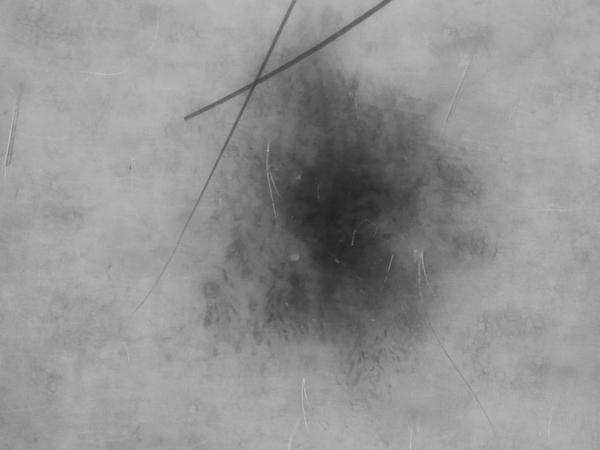

In [11]:
from google.colab.patches import cv2_imshow
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("Grayscale Image")
cv2_imshow(gray_img)

##**Applying noise - Poisson, Gaussian, Salt and Pepper, Speckle**





In [13]:
i1 = random_noise(gray_img, mode='poisson')
i2 = random_noise(gray_img, mode='gaussian')
i3 = random_noise(gray_img, mode='s&p')
i4 = random_noise(gray_img, mode='speckle')


Text(0.5, 1.0, 'Poisson Noise')

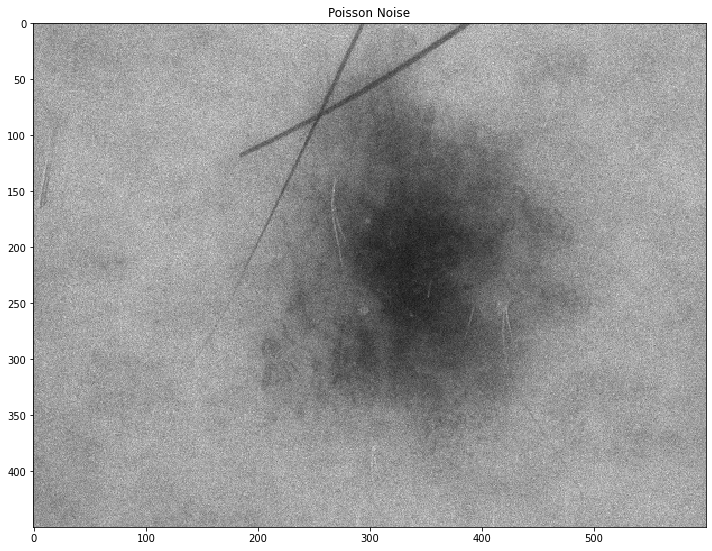

In [14]:
io.imshow(i1)
plt.title("Poisson Noise")

Text(0.5, 1.0, 'Gaussian Noise')

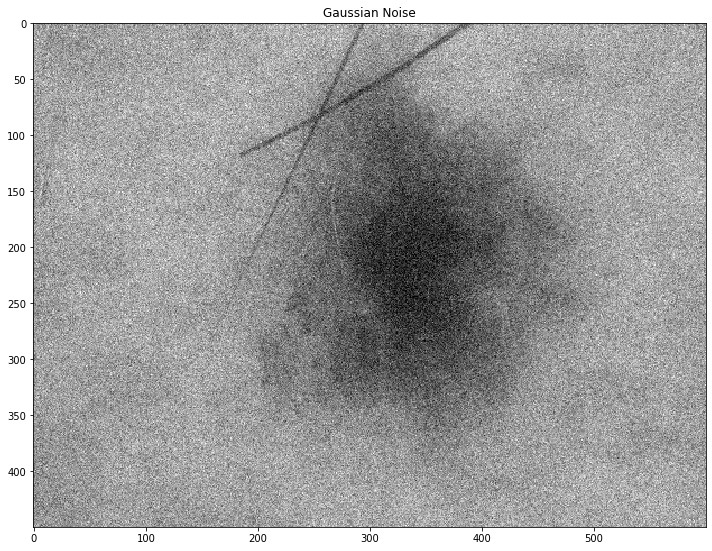

In [15]:
io.imshow(i2)
plt.title("Gaussian Noise")

Text(0.5, 1.0, 'Salt and Pepper Noise')

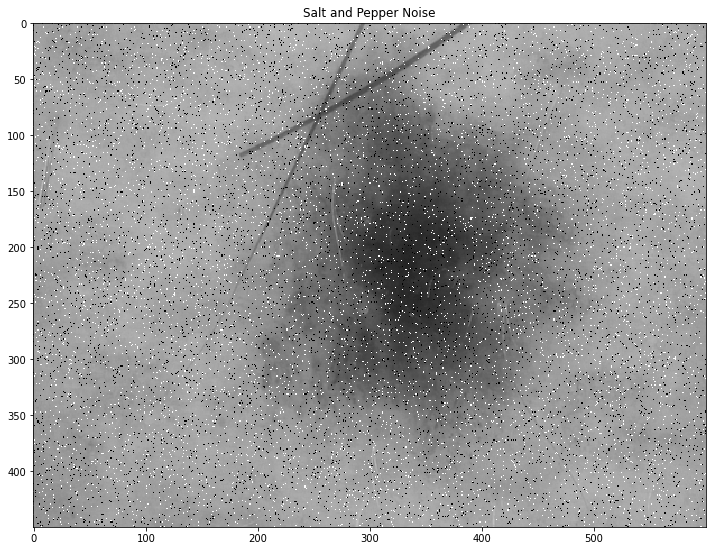

In [16]:
io.imshow(i3)
plt.title("Salt and Pepper Noise")

Text(0.5, 1.0, 'Speckle Noise')

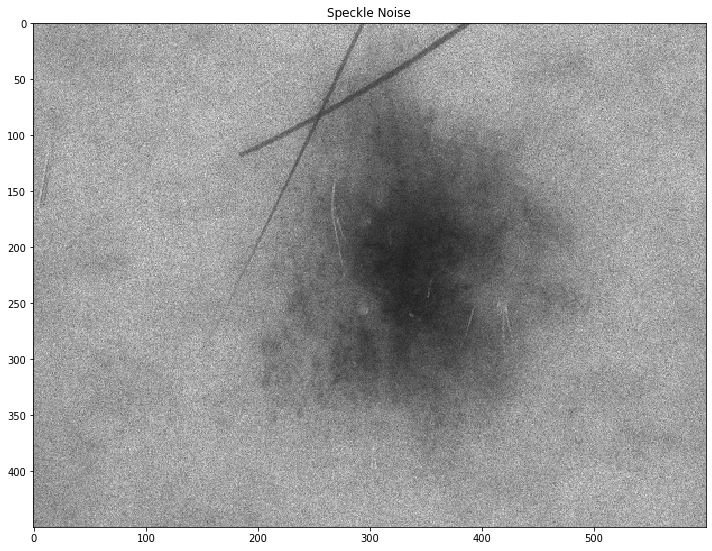

In [17]:
io.imshow(i4)
plt.title("Speckle Noise")

#Now time for denoising the images we noised..

##So we will use the following filters 🎱

**Gaussian, Median, Mean and Weiner filters**

###**Mean Filter**

Text(0.5, 1.0, 'Mean filter on Poisson noise')

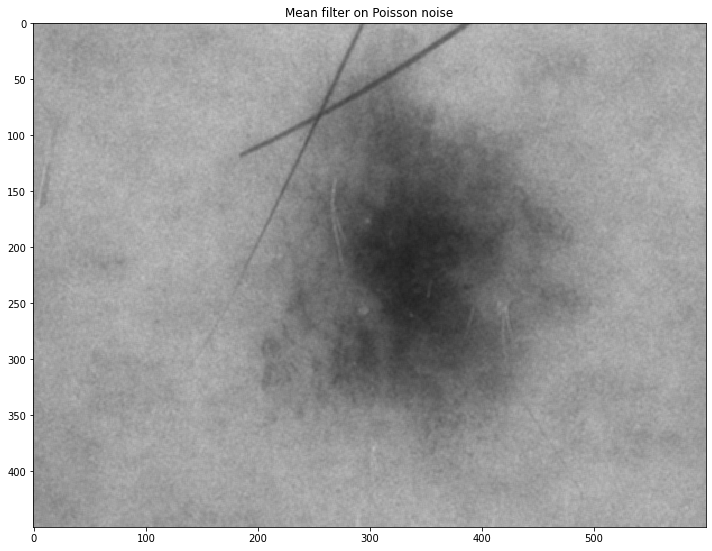

In [19]:
image = i1
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Poisson noise")

Text(0.5, 1.0, 'Mean filter on Gaussian noise')

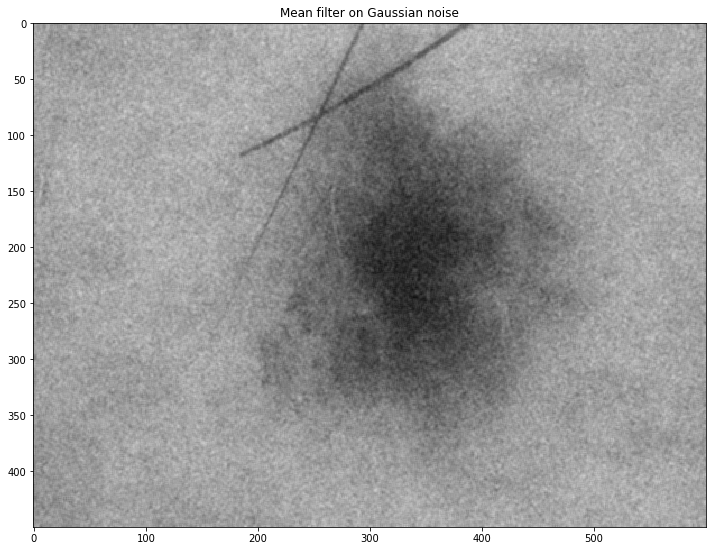

In [20]:
image = i2
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Gaussian noise")

Text(0.5, 1.0, 'Mean filter on Salt and Pepper noise')

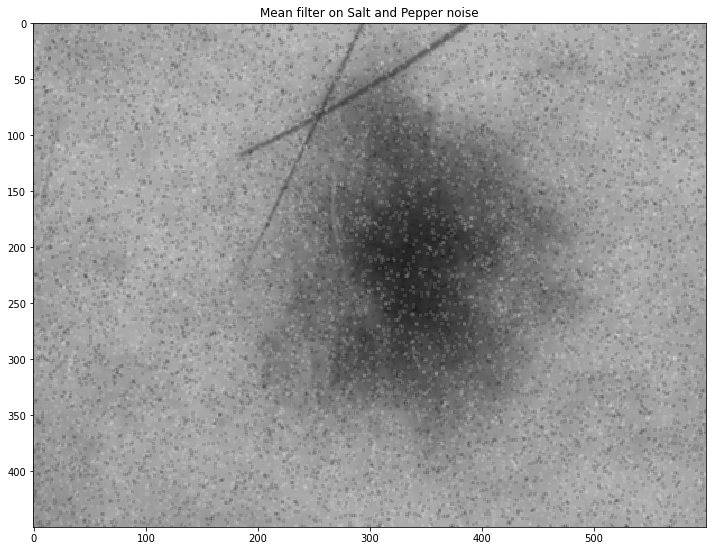

In [21]:
image = i3
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Salt and Pepper noise")

Text(0.5, 1.0, 'Mean filter on Speckle noise')

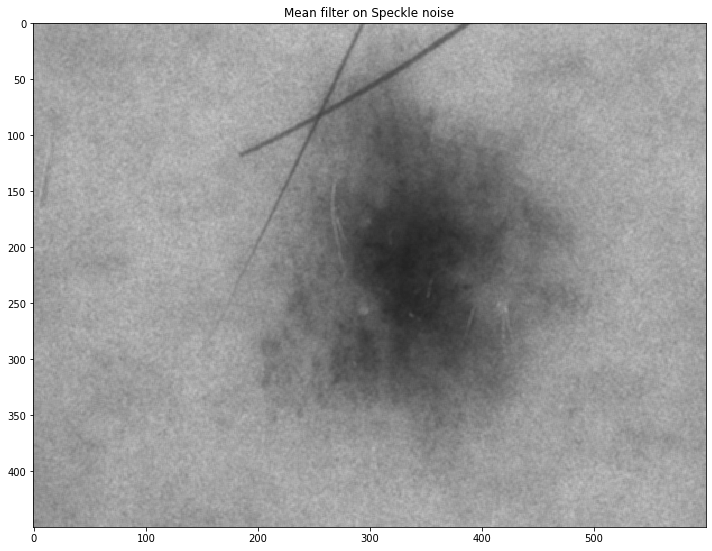

In [22]:
image = i4
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Speckle noise")

Inference:

Noises are not observable in Gaussian Noised image after filtering with Mean filter. Other noised images still have noise even after filtering.

###**Median Filter**

Text(0.5, 1.0, 'Median filter on Poisson noise')

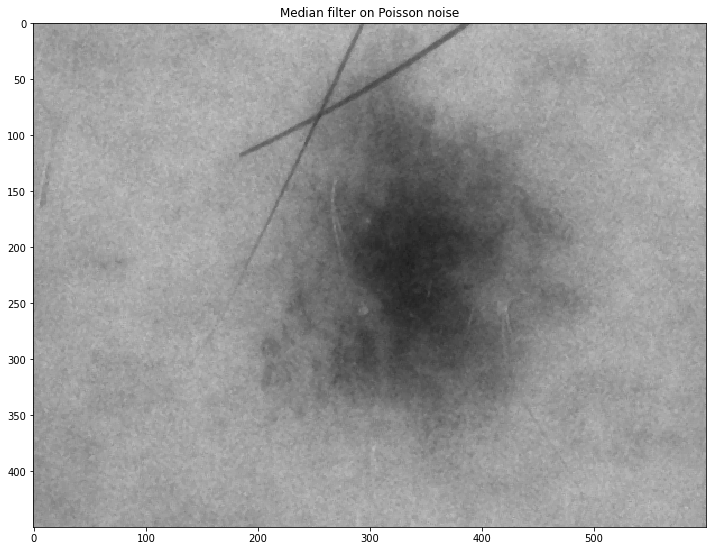

In [23]:
source = i1
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Poisson noise")

Text(0.5, 1.0, 'Median filter on Gaussian noise')

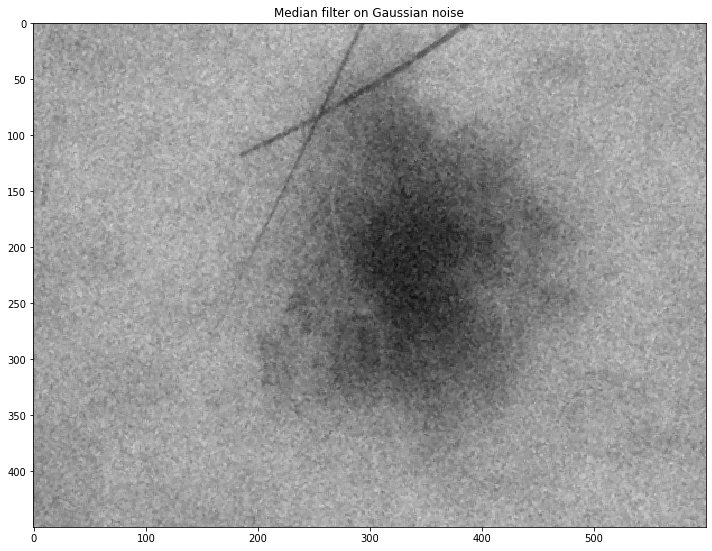

In [24]:
source = i2
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Gaussian noise")

Text(0.5, 1.0, 'Median filter on Salt and Pepper noise')

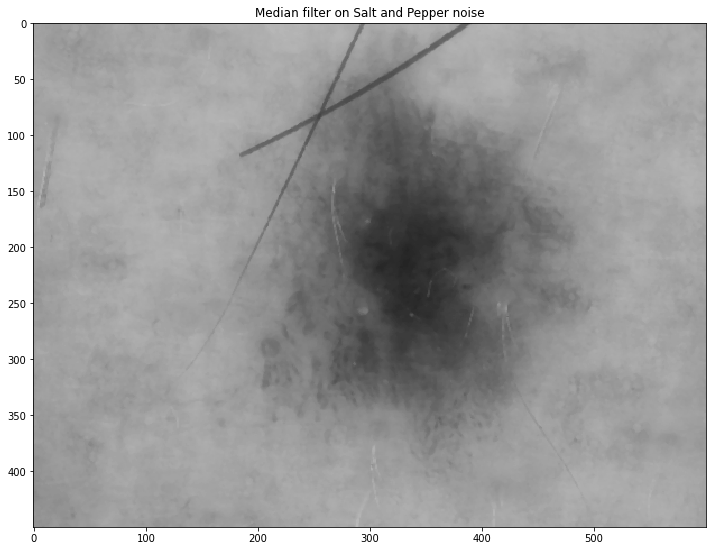

In [25]:
source = i3
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Salt and Pepper noise")

Text(0.5, 1.0, 'Median filter on Speckle noise')

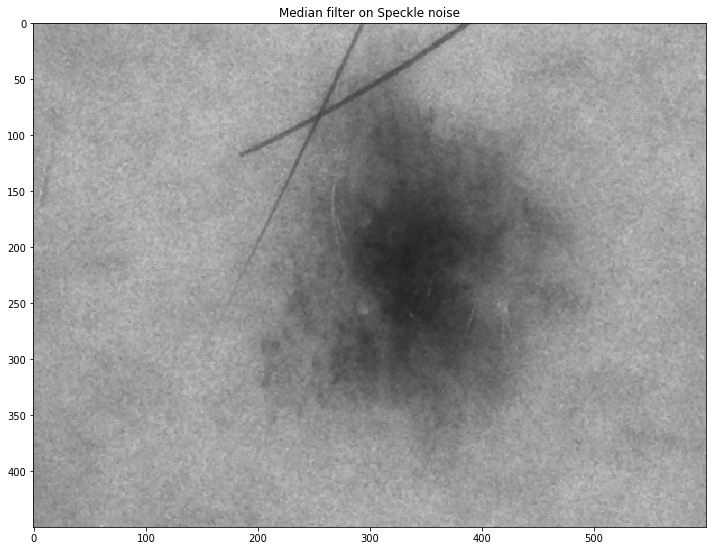

In [26]:
source = i4
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Speckle noise")

Inference:

We can observe noise on Speckle and Gaussian noise images after filtering. Median filter performs good for Gaussian Noise and Salt and Pepper.

###**Gaussian Filter**

Text(0.5, 1.0, 'Gaussian filter on Poisson noise')

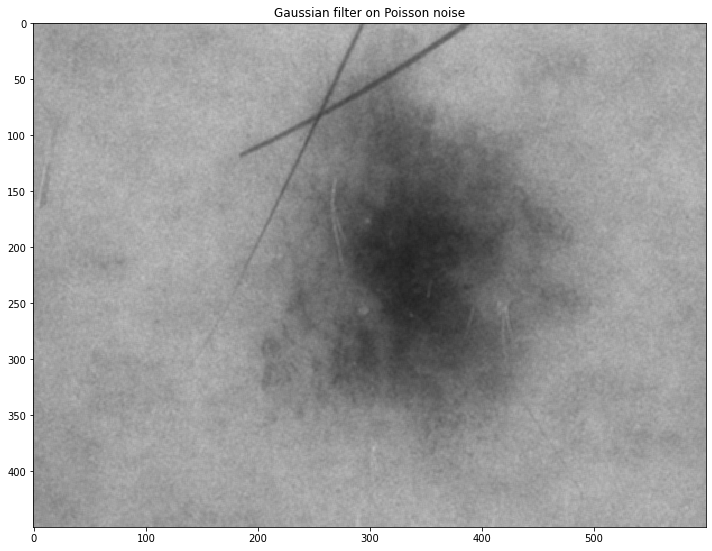

In [29]:
image = i1
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
#print(mse(gray_img, gaussian_denoise))
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Poisson noise")

Text(0.5, 1.0, 'Gaussian filter on Gaussian noise')

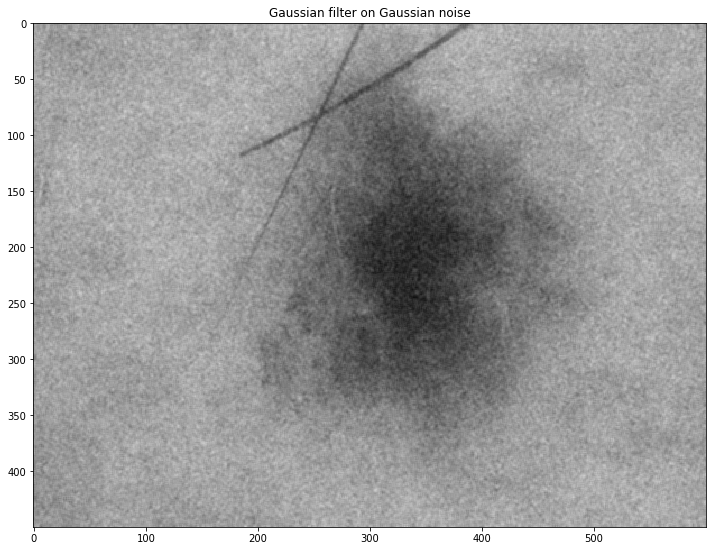

In [30]:
image = i2
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Gaussian noise")

Text(0.5, 1.0, 'Gaussian filter on Salt and Pepper noise')

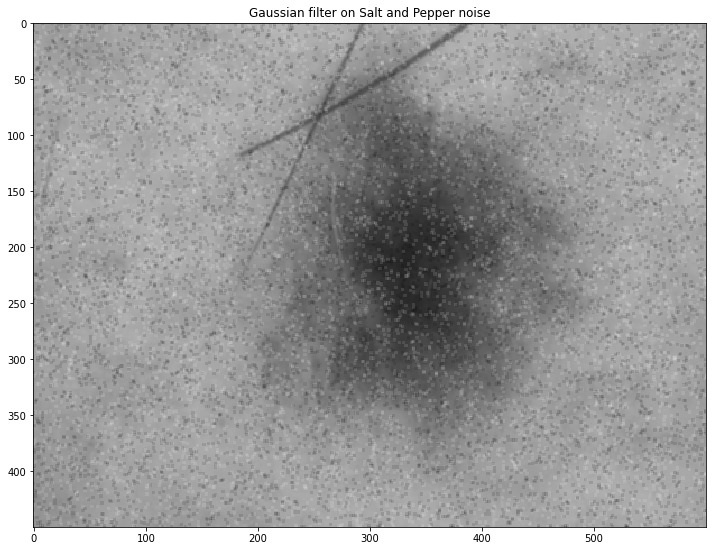

In [37]:
image = i3
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Salt and Pepper noise")

Text(0.5, 1.0, 'Gaussian filter on Speckle noise')

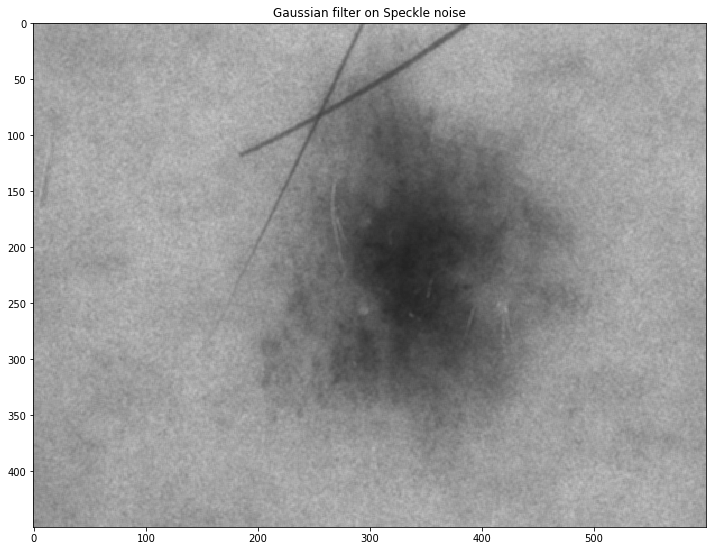

In [32]:
image = i4
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Speckle noise")

Inference:

We can see that Gaussian filter shows better results with Poisson Noise where we can see a noiseless image.

In the other images, there is still noise present. Although the image is not preserved at it's best in "Gaussian filter on Poisson noised" image, it is still better than others.

###**Weiner Filter**

Text(0.5, 1.0, 'Weiner filter on Poisson noise')

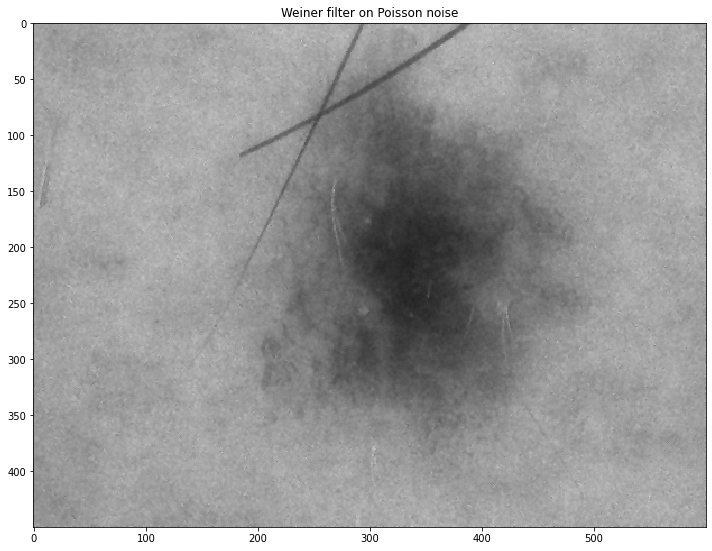

In [33]:
image = i1
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Poisson noise")

Text(0.5, 1.0, 'Weiner filter on Gaussian noise')

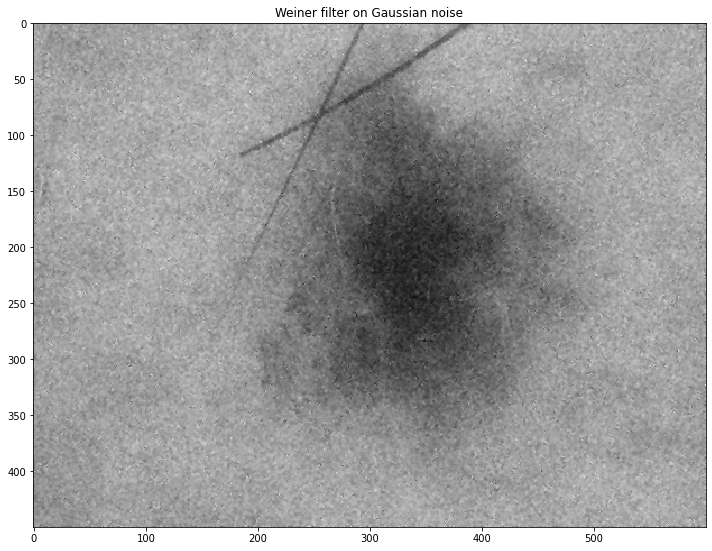

In [34]:
image = i2
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Gaussian noise")

Text(0.5, 1.0, 'Weiner filter on Salt and Pepper noise')

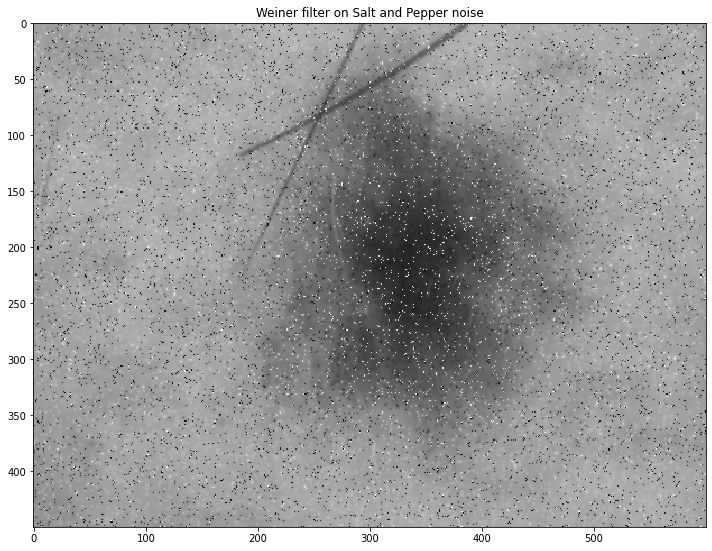

In [35]:
image = i3
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Salt and Pepper noise")

Text(0.5, 1.0, 'Weiner filter on Speckle noise')

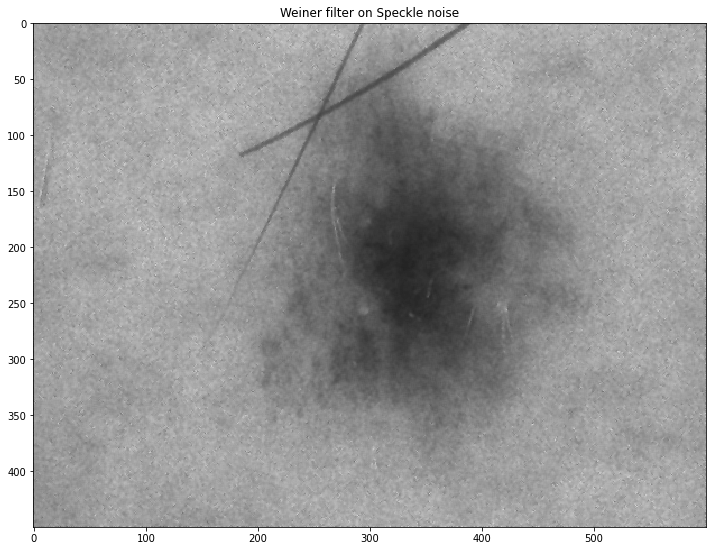

In [36]:
image = i4
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Speckle noise")

Inference:

Weiner filter performs good for Gaussian noise and Speckle noise. In Salt and Pepper noised image, we still see the black and white spots unremoved.



##**Conclusion**

Here we applied several noise to an grayscale image and then tried to suppress it using different filters.

* for gaussian noise gaussian & weiner filter seemed to suppress most of the noise

* for poisson noise all the filters worked well in suppressing

* for salt and pepper noise noise median filter worked best in suppressing

* for speckle noise noise gaussian & weiner filter worked best in suppressing

Best filters for respective noises:

* Poisson Noise: Gaussian, Median, Weiner,Mean
* Gaussian Noise: Weiner,Gaussian
* Salt and Pepper Noise: Median
* Speckle Noise: Weiner,Gaussian



